In [22]:
from math import *
import matplotlib.pyplot as plt
import ruptures as rpt
import numpy as np
import pandas as pd

[197, 400, 607, 803, 1000]
[200, 400, 605, 805, 1000]


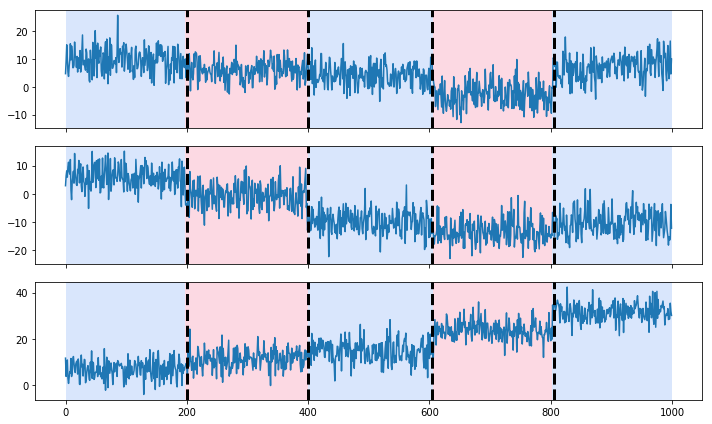

In [17]:
#Original example
# generate signal
n_samples, dim, sigma = 1000, 3, 4
n_bkps = 4  # number of breakpoints
signal, bkps = rpt.pw_constant(n_samples, dim, n_bkps, noise_std=sigma)
print(bkps)
# detection
algo = rpt.Pelt(model="rbf").fit(signal)
result = algo.predict(pen=10)
print(result)
# display
rpt.display(signal, bkps, result)
plt.show()

[987, 1754, 2657, 3553, 4471, 5487, 6557, 7431, 8287, 9160, 10000]
[985, 1750, 2660, 3555, 4470, 5500, 6555, 7425, 8285, 9280, 10000]


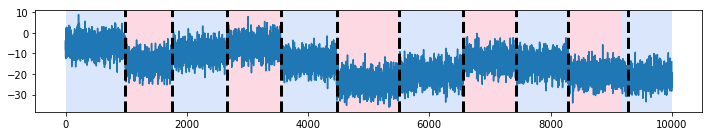

In [16]:

# generate signal
n_samples, dim, sigma = 10000, 1, 4
n_bkps = 10  # number of breakpoints
signal, bkps = rpt.pw_constant(n_samples, dim, n_bkps, noise_std=sigma)
print(bkps)
# detection
algo = rpt.Pelt(model="rbf").fit(signal)
result = algo.predict(pen=10)
print(result)
# display
rpt.display(signal, bkps, result)
plt.show()

[955, 1900, 2860, 3700, 4630, 5609, 6526, 7295, 8243, 9080, 10000]


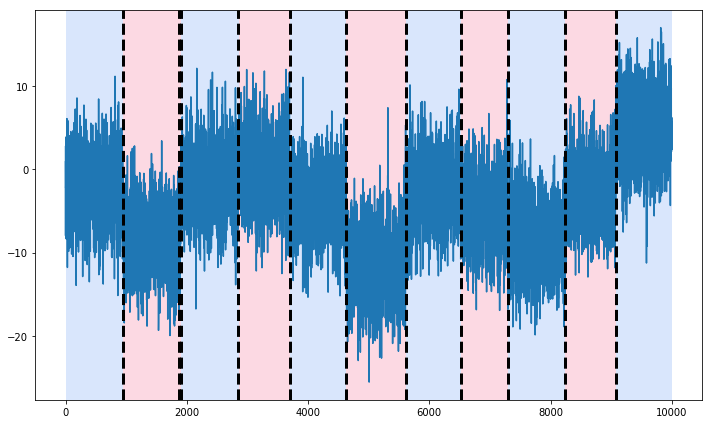

In [19]:

# generate signal
n_samples, dim, sigma = 10000, 1, 4
n_bkps = 10  # number of breakpoints
signal, bkps = rpt.pw_constant(n_samples, dim, n_bkps, noise_std=sigma)
print(bkps)

# change point detection
model = "l2"  # "l1", "rbf", "linear", "normal", "ar",...
algo = rpt.Binseg(model=model).fit(signal)
my_bkps = algo.predict(pen=np.log(n_samples) * dim * sigma ** 2)

#my_bkps = algo.predict(n_bkps=3)   #if number of breakpoints is known

# show results
rpt.show.display(signal, bkps, my_bkps, figsize=(10, 6))
plt.show()



In [44]:
def removejumps(a, threshold=0.4*pi):   #If distance between points is lower than threshold, use minimum distance, 
                                        #otherwise use interval (-pi,pi)
    b = a+0.0
    for i in range(1,np.size(a)):
        d=fmod(a[i]-a[i-1]+2*pi,2*pi)
        b[i]=fmod(b[i-1]+d+99*pi,2*pi)-pi if (threshold < d < 2*pi-threshold) else b[i-1]+d if d<pi else b[i-1]+d-2*pi
    return b
        

In [46]:
data=np.array(pd.read_csv('COLVAR',header=None, delim_whitespace=True))
n_samples=100000
dim=1
sigma=5
signal=removejumps(data[:100000,4])

<IPython.core.display.Javascript object>


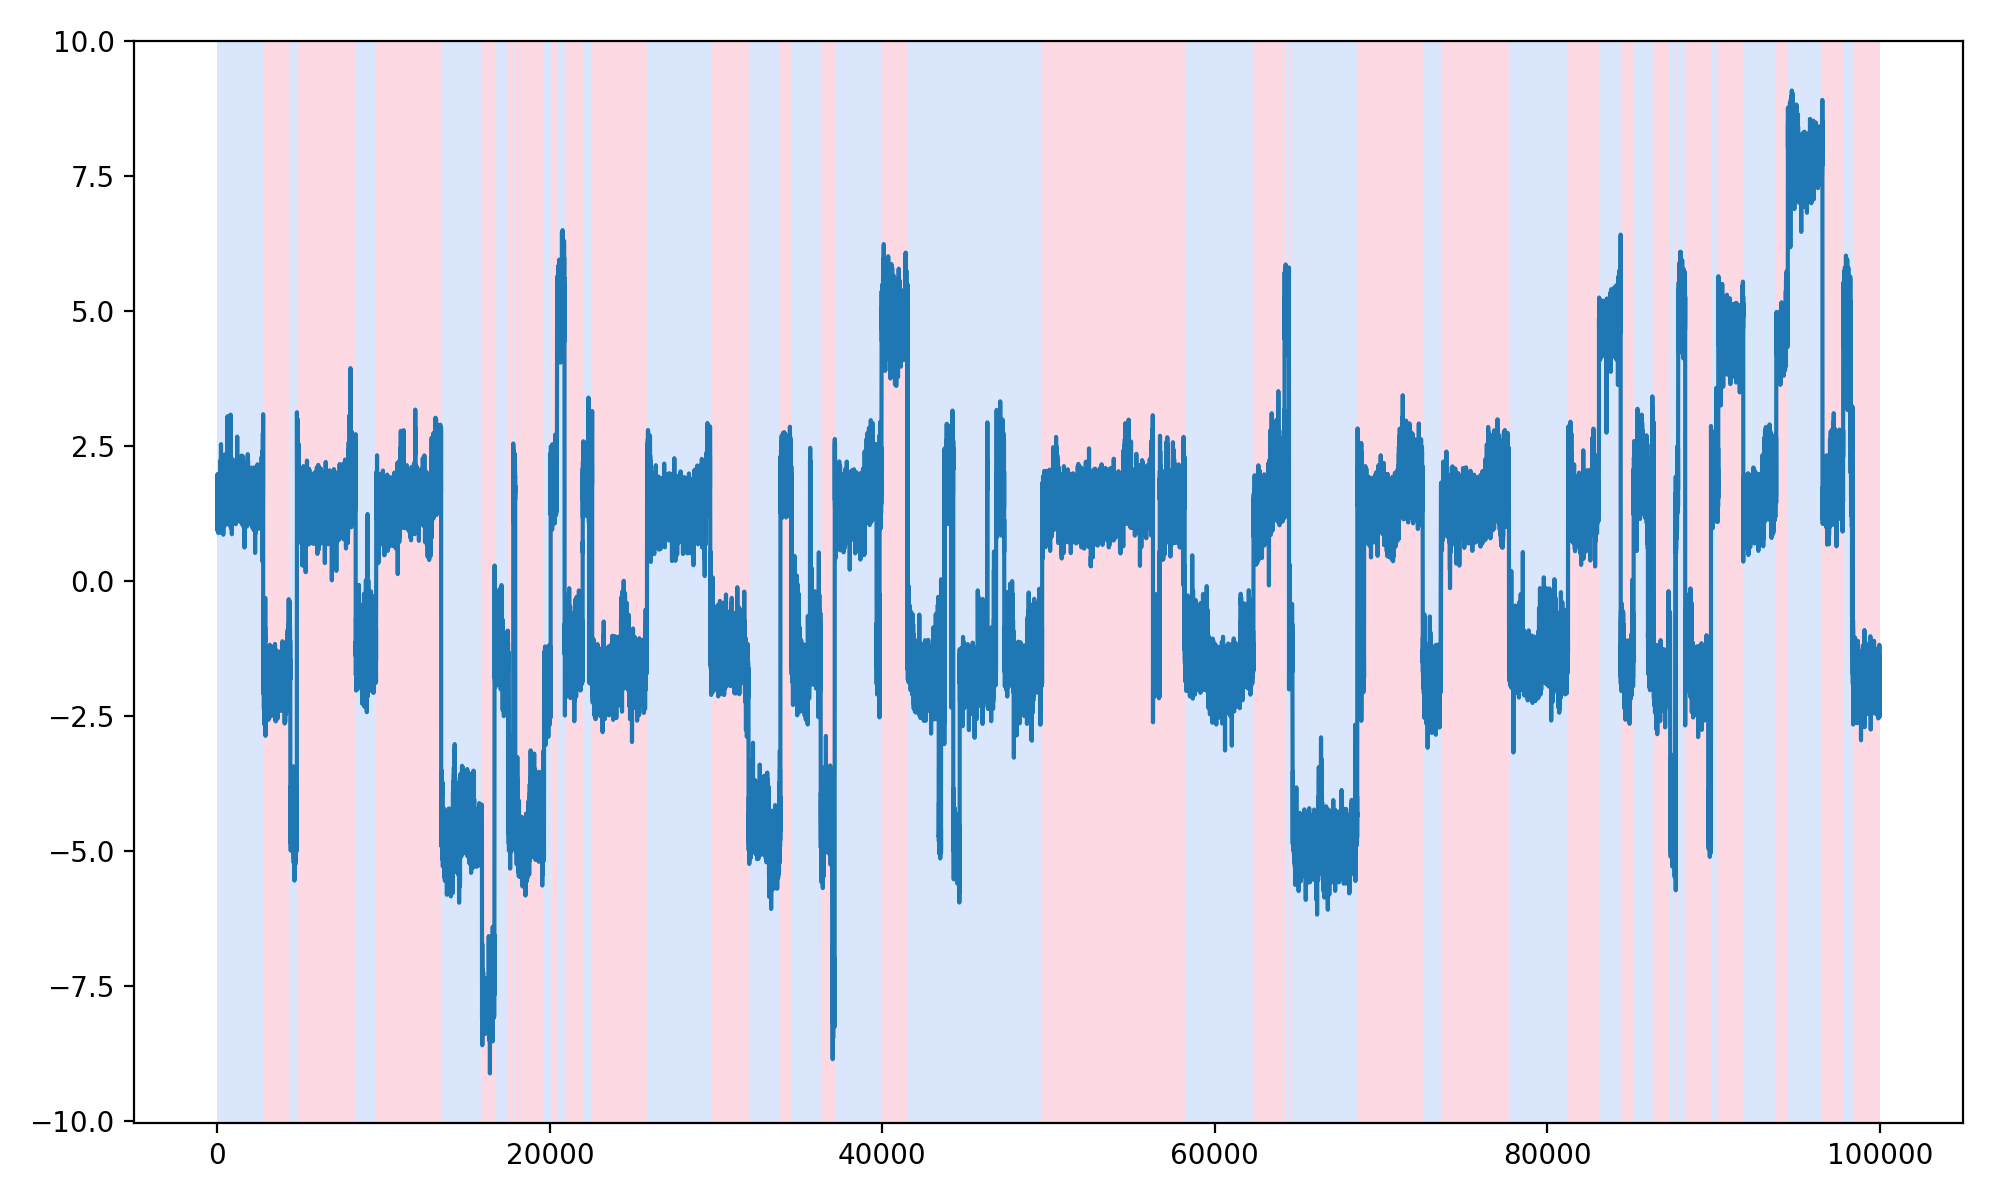

In [51]:
%matplotlib notebook

model = "l2"  # "l1", "rbf", "linear", "normal", "ar",...
algo = rpt.Binseg(model=model).fit(signal)

sigma=0.4

#my_bkps = algo.predict(n_bkps=3)   #if number of breakpoints is known
#my_bkps = algo.predict(pen=np.log(n_samples) * dim * sigma ** 2)
my_bkps = algo.predict(epsilon=3 * n_samples * sigma ** 2)    

# show results
rpt.show.display(signal, my_bkps, figsize=(10, 6))
plt.show()

